# Loading Data and Finding Events

The following is a brief tutorial on how to load data from the upper limb dataset as provided in `Upper limb movements can be decoded from the time-domain of low-frequency EEG`

In [4]:
import pandas as pd
import numpy as np
import mne
from mne.channels import read_montage
from mne import create_info
from mne.io import RawArray

from mne.preprocessing import create_eog_epochs, ICA
from mne import Epochs, pick_types

In [16]:
subject, trial = 1,1
file_location = 'D:/Datasets/ULM/S%02d_ME/motorexecution_subject%d_run%d.gdf' % (subject, subject, trial)
raw = mne.io.read_raw_edf(file_location, preload= True)

Extracting EDF parameters from D:/Datasets/ULM/S01_ME/motorexecution_subject1_run1.gdf...
GDF file detected
Overlapping events detected. Use find_edf_events for the original events.
Setting channel info structure...
Interpolating stim channel. Events may jitter.
Creating raw.info structure...
3 channel names are too long, have been truncated to 15 characters:
['ShoulderAdductio', 'ShoulderFlexionE', 'ShoulderRotation']
Channel names are not unique, found duplicates for: {'eeg'}. Applying running numbers for duplicates.
Reading 0 ... 164863  =      0.000 ...   321.998 secs...


C:\Users\mschr\AppData\Local\conda\conda\envs\mne\lib\site-packages\mne\io\edf\edf.py:1028: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, np.uint8).tolist()[0]
<ipython-input-16-5c9b9608f1e0>:3: RuntimeWarning: Overlapping events detected. Use find_edf_events for the original events.
  raw = mne.io.read_raw_edf(file_location, preload= True)
<ipython-input-16-5c9b9608f1e0>:3: RuntimeWarning: Interpolating stim channel. Events may jitter.
  raw = mne.io.read_raw_edf(file_location, preload= True)
<ipython-input-16-5c9b9608f1e0>:3: RuntimeWarning: 3 channel names are too long, have been truncated to 15 characters:
['ShoulderAdductio', 'ShoulderFlexionE', 'ShoulderRotation']
  raw = mne.io.read_raw_edf(file_location, preload= True)
<ipython-input-16-5c9b9608f1e0>:3: RuntimeWarning: Channel names are not unique, found duplicates for: {'eeg'}. Applying running numbers for d

From running these commands we see that there are error and indicate a solution to a possibly juttering events. Also, some of the names packaged with the data are in fact too long. Lastly, there are many "eeg" trials so it has no choice but to label them "eeg_" where _ is from 0 to 61. Let's fix these errors.

In [6]:
events = mne.io.find_edf_events(raw)

In [11]:
events

[294, array([  2560,   2560,   2560,   3584,   5120,   5120,   5120,   6187,
          6187,   6187,   7211,   8747,   8747,   8747,  10122,  10122,
         10122,  11146,  12682,  12682,  12682,  13902,  13902,  13902,
         14926,  16462,  16462,  16462,  17568,  17568,  17568,  18592,
         20128,  20128,  20128,  21299,  21299,  21299,  22323,  23859,
         23859,  23859,  24900,  24900,  24900,  25924,  27460,  27460,
         27460,  28606,  28606,  28606,  29630,  31166,  31166,  31166,
         32194,  32194,  32194,  33218,  34754,  34754,  34754,  35817,
         35817,  35817,  36841,  38377,  38377,  38377,  39810,  39810,
         39810,  40834,  42370,  42370,  42370,  43901,  43901,  43901,
         44925,  46461,  46461,  46461,  47702,  47702,  47702,  48726,
         50262,  50262,  50262,  51318,  51318,  51318,  52342,  53878,
         53878,  53878,  55261,  55261,  55261,  56285,  57821,  57821,
         57821,  58972,  58972,  58972,  59996,  61532,  61

According to the documentation, this commond outputs 5 elements in the form of a list. The first element (`events[0]`) is n_events for the number of all events. In this case there are 294 events which in fact appear to have been repeated three times. The second element (`events[1]`) is the start time of all the samples. The third element (`events[2]`) is the type of event, such as 1542 for rest and so on as indicated in the associated pdf that comes with the dataset. The fourth element (`events[3]`) is an array of 0's indicating that the event is for all channels. Lastly, (`events[4]`) indicates the duration of the event and in this case 1/512 Hz. In order to run some of the built-in functions in mne, a raw array needs to be created.

In [18]:
eeg_names = ["F3", "F1", "Fz", "F2", "F4", "FFC5h", "FFC3h", "FFC1h", "FFC2h", "FFC4h",
            "FFC6h", "FC5", "FC3", "FC1", "FCz", "FC2", "FC4", "FC6", "FTT7h", "FCC5h",
            "FCC3h", "FCC1h", "FCC2h", "FCC4h", "FCC6h", "FTT8h", "C5", "C3", "C1", "Cz",
            "C2", "C4", "C6", "TTP7h", "CCP5h", "CCP3h", "CCP1h", "CCP2h", "CCP4h", "CCP6h",
            "TTP8h", "CP5", "CP3", "CP1", "CPz", "CP2", "CP4", "CP6", "CPP5h", "CPP3h",
            "CPP1h", "CPP2h", "CPP4h", "CPP6h", "P3", "P1", "Pz", "P2", "P4", "PPO1h",
            "PPO2h"]
eog_names = ["eog-r", "eog-m", "eog-l"]
glove_sensors = ["thumb_near", "thumb_far", "thumb_index", "index_near", "index_far", "index_middle",
             "middle_near", "middle_far", "middle_ring", "ring_near", "ring_far", "ring_little", "litte_near",
                 "litte_far", "thumb_palm", "wrist_bend", "roll", "pitch", "gesture"]
exo_sensors = ["handPosX", "handPosY", "handPosZ", "elbowPosX", "elbowPosY", "elbowPosZ", "ShoulderAdd",
                       "ShoulderFlex", "ShoulderRot", "Elbow", "ProSupination", "Wrist", "GripPressure"]
stim_channel = ["STIM"]
channel_type = ['eeg']*len(eeg_names) + ['eog']*len(eog_names) + ['misc']*len(glove_sensors) + ['stim']*len(exo_sensors) + ['stim']
montage = read_montage('standard_1005', eeg_names)
channel_names = eeg_names + eog_names + glove_sensors + exo_sensors + stim_channel
# Create all data into a RawArray
info = create_info(channel_names, sfreq=512.0, ch_types=channel_type, montage=montage)
k = raw.get_data()
# Seperate k into pandas dataframes of data
eeg_data = k[0:61, :]
eog_data = k[61:64, :]
glove_data = k[64:83, :]
exo_data = k[83:96, :]
stim_data = k[96:97, :][0]

teeg = pd.DataFrame(eeg_data.T, columns=eeg_names)
teog = pd.DataFrame(eog_data.T, columns=eog_names)
tglove = pd.DataFrame(glove_data.T, columns=glove_sensors)
texo = pd.DataFrame(exo_data.T, columns=exo_sensors)
tstim = pd.DataFrame(stim_data.T, columns=stim_channel)
t_df = pd.concat([teeg.reset_index(drop=True), teog, tglove, texo, tstim], axis=1)
j = t_df.dropna()
raw = RawArray(j.T, info, verbose=False).load_data()

In [19]:
found_events = mne.find_events(raw.copy().pick_channels(["STIM"]))

126 events found
Event IDs: [  1536   1537   1538   1539   1540   1541   1542   2339 101394 101395
 101396 101397 101398 101399 101400]


In [20]:
found_events

array([[  2560,      0,   2339],
       [  3584,      0,   1537],
       [  5120,      0, 101395],
       [  6187,      0,   2339],
       [  7211,      0,   1541],
       [  8747,      0, 101399],
       [ 10122,      0,   2339],
       [ 11146,      0,   1542],
       [ 12682,      0, 101400],
       [ 13902,      0,   2339],
       [ 14926,      0,   1542],
       [ 16462,      0, 101400],
       [ 17568,      0,   2339],
       [ 18592,      0,   1537],
       [ 20128,      0, 101395],
       [ 21299,      0,   2339],
       [ 22323,      0,   1536],
       [ 23859,      0, 101394],
       [ 24900,      0,   2339],
       [ 25924,      0,   1536],
       [ 27460,      0, 101394],
       [ 28606,      0,   2339],
       [ 29630,      0,   1538],
       [ 31166,      0, 101396],
       [ 32194,      0,   2339],
       [ 33218,      0,   1540],
       [ 34754,      0, 101398],
       [ 35817,      0,   2339],
       [ 36841,      0,   1542],
       [ 38377,      0, 101400],
       [ 3

When using the `mne.find_events` function, it takes the events listed earlier and condenses all the events into a more simplified array. For example in the first event starting at 2560, the stim codes show `768+785+786` which when added is 2339. This indicates that start of trials. Let's plot the codes in time to see if we can understand the true meaning of these codes. When looking into the unique codes, it can be shown that there are 7 events starting with `15**` and 7 events starting with `34***`. The remaining 2 events starting with `33***` always proceed the `34***` codes. 

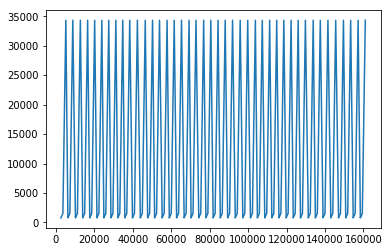

In [46]:
np_events = np.array(events[1:3])
import matplotlib.pyplot as plt
x = np_events[0, :]
y = np_events[1,:]
plt.plot(x,y)

In [52]:
unique_times = np.unique(np_events[0,:])

In [53]:
unique_times

array([  2560,   3584,   5120,   6187,   7211,   8747,  10122,  11146,
        12682,  13902,  14926,  16462,  17568,  18592,  20128,  21299,
        22323,  23859,  24900,  25924,  27460,  28606,  29630,  31166,
        32194,  33218,  34754,  35817,  36841,  38377,  39810,  40834,
        42370,  43901,  44925,  46461,  47702,  48726,  50262,  51318,
        52342,  53878,  55261,  56285,  57821,  58972,  59996,  61532,
        62774,  63798,  65334,  66695,  67719,  69255,  70303,  71327,
        72863,  74306,  75330,  76866,  78024,  79048,  80584,  81793,
        82817,  84353,  85505,  86529,  88065,  89345,  90369,  91905,
        93311,  94335,  95871,  97224,  98248,  99784, 101214, 102238,
       103774, 104817, 105841, 107377, 108651, 109675, 111211, 112328,
       113352, 114888, 116028, 117052, 118588, 119800, 120824, 122360,
       123487, 124511, 126047, 127256, 128280, 129816, 131322, 132346,
       133882, 135004, 136028, 137564, 138978, 140002, 141538, 143029,
      

In [40]:
unique_codes = np.unique(np_events[1,:])

In [41]:
unique_codes

array([  768,   785,   786,  1536,  1537,  1538,  1539,  1540,  1541,
        1542, 33536, 33554, 34304, 34305, 34306, 34307, 34308, 34309,
       34310], dtype=uint32)

With all this in mind, the overlapping events do exist in the data, however the simpler functions takes care of the problem well enough to not need to recreate another function. We can also confirm that events found using `mne.find_events` and those with unique times are equivalent and no actions are needed. While an error level can be set to not visual see this, it is poor practice to not show the error. In this case, `mne.find_events` will work fine for the data. 

In [56]:
len(unique_times) == len(found_events[:,0])

True